In [145]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
cnt= 0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        cnt+=1 
        #print(os.path.join(dirname, filename))
print ('cnt',cnt)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

cnt 506


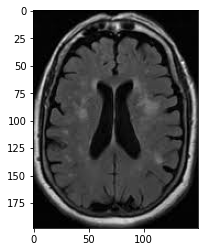

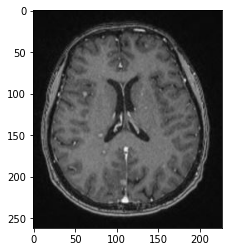

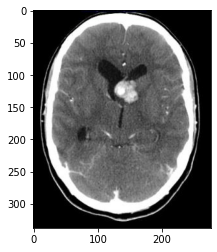

In [146]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/'):
    for filename in filenames:
        cnt+=1
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path)
        plt.imshow(img,cmap='gray')
        plt.show()
        if cnt > 2:
            break

In [147]:
#label for yes = 0, label for no = 1

desired_width = 228
desired_height = 228

img_list = []
label_list = []
cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/'):
    for filename in filenames:
        cnt+=1
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, (desired_width,desired_height))
        #img_list.append(resized_img/255.0)
        img_list.append(resized_img)
        label_list.append(0)        
        #print (type(img))
        #plt.imshow(img,cmap='gray')
        #plt.show()


print ('len(img_list)',len(img_list))
print ('len(label_list)',len(label_list))

len(img_list) 155
len(label_list) 155


In [148]:
for dirname, _, filenames in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/'):
    for filename in filenames:
        cnt+=1
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, (desired_width,desired_height))
        #img_list.append(resized_img/255.0)
        img_list.append(resized_img)
        label_list.append(1)        
        #print (type(img))
        #plt.imshow(img,cmap='gray')
        #plt.show()


print ('len(img_list)',len(img_list))
print ('len(label_list)',len(label_list))

len(img_list) 253
len(label_list) 253


In [149]:
import numpy as np
img_list = np.asarray(img_list).astype(np.uint8)

print (img_list.shape)

(253, 228, 228, 3)


In [150]:
label_list =np.asarray(label_list)
print (label_list.shape)

(253,)


In [151]:
label_list[:5]

array([0, 0, 0, 0, 0])

In [152]:
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical

category_label = to_categorical(label_list,num_classes=2)
print(category_label[:5])
print(category_label[-5:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [153]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(img_list,category_label,test_size=0.3)

print ('x_train.shape',x_train.shape)
print ('y_train.shape',y_train.shape)

x_train.shape (177, 228, 228, 3)
y_train.shape (177, 2)


In [154]:
from torchvision.transforms import transforms

train_img_transforms = transforms.Compose([transforms.ToPILImage() ,
                                           transforms.RandomHorizontalFlip(p=0.9),
                                           transforms.RandomVerticalFlip(p=0.9),
                                           #transforms.RandomRotation(degrees=180),
                                           #transforms.CenterCrop(228),
                                           #transforms.RandomAffine(10),
                                           transforms.ToTensor()]
                                         )



In [155]:
from torch.utils.data import Dataset

class tumor_dataset(Dataset):
    def __init__(self,x,y,transform,test_ind=0):
        self.test_ind= test_ind
        #self.x = x
        
        self.x = x
        self.y = y
        self.transform =transform
    
    def __len__(self):
        length = len(self.x)
        print ('length',length)
        return length
    
    
    def __getitem__(self,idx):
        img_data = self.x[idx]
        lbl_data = self.y[idx]
        img_data1 = self.transform(img_data)
        
        if test_ind ==0:
            
            return img_data1,lbl_data
        else:
            return img_data1
    
    
        

In [156]:
test_ind= 0
train_ds = tumor_dataset(x_train, y_train,train_img_transforms,test_ind)

In [157]:
from torch.utils.data import DataLoader

batch_size= 2
train_data_loader = DataLoader(train_ds,batch_size=batch_size)

In [158]:
data_iter = iter(train_data_loader)
img, label = data_iter.next()

print ('img shape',img.size())
print ('label shape',label.size())



length 177
img shape torch.Size([2, 3, 228, 228])
label shape torch.Size([2, 2])


In [159]:
img[0].size()

torch.Size([3, 228, 228])

In [160]:
label[0].size()

torch.Size([2])

In [161]:
label[0]

tensor([0., 1.])

In [162]:
img[0]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [163]:
import torch.nn  as nn
import torch.nn.functional as F

class brain_net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3,32,5)
        self.pool1 = nn.MaxPool2d(2,2)
                
        self.conv2 = nn.Conv2d(32,64,5)
        self.pool2 = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(64 * 54*54, 1000)
        self.fc2 = nn.Linear(1000,2)
        
    def forward(self,x):
        conv1_x = F.relu(self.conv1(x))
        pool1_x = self.pool1(conv1_x)
        
        conv2_x = F.relu(self.conv2(pool1_x))
        pool2_x = self.pool2(conv2_x)
        
        #print ('pool2_x shape',pool2_x.size())
        
        flat_x = pool2_x.view(pool2_x.shape[0],-1)
        
        #print ('flat_x shape',flat_x.size())
        
        fc1_x =  F.relu(self.fc1(flat_x))
        fc2_x = self.fc2 (fc1_x)
        
        return fc2_x
        
        
        

In [164]:
data_iter = iter(train_data_loader)
img, label = data_iter.next()

print ('img shape',img.size())
print ('label shape',label.size())

length 177
img shape torch.Size([2, 3, 228, 228])
label shape torch.Size([2, 2])


In [165]:
brain_model = brain_net()
output = brain_model(img)
print ('output',output )
max_pred = output.argmax(axis=1)
print ('max_pred',max_pred)

output tensor([[-0.0346, -0.0137],
        [-0.0315, -0.0035]], grad_fn=<AddmmBackward0>)
max_pred tensor([1, 1])


In [166]:
import torch

epochs = 10
brain_model = brain_net()
brain_model.train()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=brain_model.parameters(),lr=0.001)


batch_size= 10
train_data_loader = DataLoader(train_ds,batch_size=batch_size)

for e in range(epochs):
    
    running_loss = 0
    cnt = 0
    
    for i, data in enumerate(train_data_loader):
        
        #print ('i',i)
         
        cnt+=1
        img = data[0]
        label = data[1]
        
        output =brain_model (img)
        
        loss = criterion(output,label)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        running_loss+= loss.item()
        
        if cnt%5 == 4:
            print (f'epoch: {e} , i: {i}, loss: {running_loss}')
            running_loss= 0
            
        
        
        
    

length 177
epoch: 0 , i: 3, loss: 19.913184762001038
epoch: 0 , i: 8, loss: 2.7639191150665283
epoch: 0 , i: 13, loss: 2.9126369953155518
length 177
epoch: 1 , i: 3, loss: 2.5953376293182373
epoch: 1 , i: 8, loss: 2.831340789794922
epoch: 1 , i: 13, loss: 2.715489089488983
length 177
epoch: 2 , i: 3, loss: 2.0172738134860992
epoch: 2 , i: 8, loss: 2.1871801167726517
epoch: 2 , i: 13, loss: 2.0349583625793457
length 177
epoch: 3 , i: 3, loss: 1.7069473266601562
epoch: 3 , i: 8, loss: 1.7394937351346016
epoch: 3 , i: 13, loss: 1.591187447309494
length 177
epoch: 4 , i: 3, loss: 0.7909609377384186
epoch: 4 , i: 8, loss: 0.8349638804793358
epoch: 4 , i: 13, loss: 1.229105293750763
length 177
epoch: 5 , i: 3, loss: 0.9515037108212709
epoch: 5 , i: 8, loss: 0.4663673900067806
epoch: 5 , i: 13, loss: 0.5795785430818796
length 177
epoch: 6 , i: 3, loss: 0.7076291553676128
epoch: 6 , i: 8, loss: 0.38512926176190376
epoch: 6 , i: 13, loss: 0.35604225378483534
length 177
epoch: 7 , i: 3, loss: 0.

In [167]:
test_img_transforms = transforms.Compose([transforms.ToPILImage() ,  transforms.ToTensor()])

test_ind= 1
#no need to to pass y_test, but its ok
test_ds = tumor_dataset(x_test, y_test,test_img_transforms,test_ind)

test_data_loader = DataLoader(test_ds,batch_size=batch_size)

In [168]:
all_pred_tensor = torch.LongTensor()
for i, data in enumerate(test_data_loader):
    img = data
    #print (img.size())
    output = brain_model (img)
    max_pred = output.argmax(axis=1)
    #print ('max_pred size',max_pred.size())
    #print ('max_pred',max_pred)
    all_pred_tensor = torch.cat((all_pred_tensor,max_pred), dim=0)
    #print ('all_pred_tensor',all_pred_tensor)
print ('all_pred_tensor size',all_pred_tensor.size())
    
    

length 76
all_pred_tensor size torch.Size([76])


In [169]:
all_pred_array = all_pred_tensor.numpy()
all_pred_array.shape

(76,)

In [170]:
y_test.shape

(76, 2)

In [171]:
max_y_true= y_test.argmax(axis=1)
max_y_true.shape
#type(max_y_true)

(76,)

In [172]:
from sklearn.metrics import accuracy_score

score= accuracy_score(all_pred_array,max_y_true)
score

0.6710526315789473